In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy as sp
import os
import pandas as pd

from skimage import img_as_float
from skimage.morphology import reconstruction, h_maxima, h_minima
from skimage import morphology

import torch
import torch.nn as nn
import torch.nn.functional as F


In [49]:
df = pd.read_csv('../data/df.csv')
df['label_id'] = df.label.apply( lambda x : 0.)
df_data = df.groupby('path')
def get_data(img_id):
    if img_id not in df_data.groups:
        return dict(image_id=img_id, boxes=list())
    
    data  = df_data.get_group(img_id)
#     boxes = data['bbox'].values
    boxes = data[['xmin', 'ymin', 'w', 'h', 'label_id']].values
#     labels = data['label'].values
    return dict(image_id = img_id, boxes = boxes)
#     return dict(image_id = img_id, boxes = boxes, labels=labels)

(512, 512, 3)


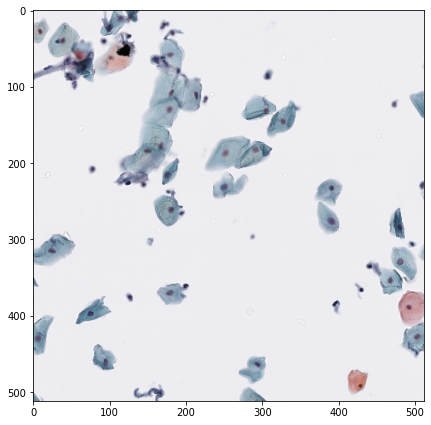

In [50]:
path = '/home/Dataset/scl/patch_images/2021.01.06/LBC24-20210102(1)/'
file_list = ['patch_images/2021.01.06/LBC24-20210102(1)/' + d for d in os.listdir(path)]
file_list[:2]

test_list = [get_data(img_id) for img_id in file_list]
test_list[:2]
img = cv2.imread('/home/Dataset/scl/' + test_list[100]['image_id'])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, dsize=(512, 512))
print(img.shape)

plt.figure(figsize=(7, 10))
plt.imshow(img);

In [65]:
t_img = torch.tensor(img).permute(2,0,1)
print(t_img.shape)
t_img = t_img.permute(1,2,0)
print(t_img.shape)

torch.Size([3, 512, 512])
torch.Size([512, 512, 3])


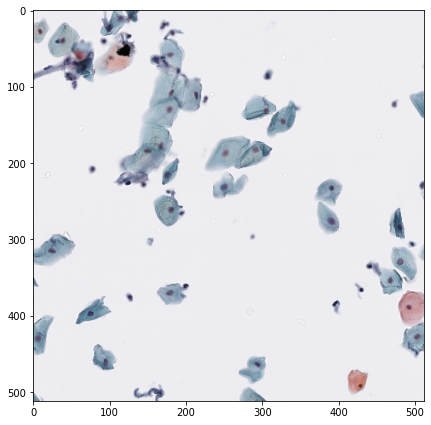

In [66]:
plt.figure(figsize=(7, 10))
plt.imshow(t_img);

In [71]:
t_img = torch.tensor(img)
print(t_img.shape)
t_img = t_img.permute(2,0,1)
# t_img = t_img.permute(2,0,1)
print(t_img.unsqueeze(dim=0).shape)
unfold = nn.Unfold(kernel_size=(64, 64), stride=32)
output = unfold(t_img.unsqueeze(dim=0).float())
print(output.size())

torch.Size([512, 512, 3])
torch.Size([1, 3, 512, 512])
torch.Size([1, 12288, 225])


tensor([[237, 236, 241],
        [238, 237, 242],
        [239, 239, 241],
        [239, 238, 242],
        [239, 238, 243],
        [240, 240, 241],
        [236, 236, 240],
        [237, 236, 241],
        [239, 239, 244],
        [238, 238, 243],
        [237, 236, 241],
        [238, 238, 240],
        [238, 238, 242],
        [238, 237, 242],
        [238, 238, 242],
        [238, 238, 242],
        [239, 238, 243],
        [238, 237, 242],
        [237, 237, 242],
        [239, 239, 241],
        [239, 238, 243],
        [238, 238, 240],
        [238, 237, 242],
        [239, 238, 243],
        [238, 237, 242],
        [238, 237, 242],
        [238, 237, 242],
        [237, 238, 241],
        [238, 239, 243],
        [237, 238, 242],
        [239, 240, 242],
        [238, 237, 242],
        [239, 238, 243],
        [240, 239, 244],
        [239, 238, 243],
        [239, 238, 243],
        [239, 238, 242],
        [238, 238, 240],
        [238, 238, 241],
        [238, 236, 241],


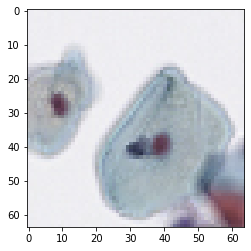

In [127]:
p = t_img[:,:64,:64]
plt.imshow(p.permute(1,2,0))
p.permute(1,2,0)[1]

torch.Size([12288])
tensor([[237., 236., 241.],
        [238., 237., 242.],
        [239., 239., 241.],
        [239., 238., 242.],
        [239., 238., 243.],
        [240., 240., 241.],
        [236., 236., 240.],
        [237., 236., 241.],
        [239., 239., 244.],
        [238., 238., 243.],
        [237., 236., 241.],
        [238., 238., 240.],
        [238., 238., 242.],
        [238., 237., 242.],
        [238., 238., 242.],
        [238., 238., 242.],
        [239., 238., 243.],
        [238., 237., 242.],
        [237., 237., 242.],
        [239., 239., 241.],
        [239., 238., 243.],
        [238., 238., 240.],
        [238., 237., 242.],
        [239., 238., 243.],
        [238., 237., 242.],
        [238., 237., 242.],
        [238., 237., 242.],
        [237., 238., 241.],
        [238., 239., 243.],
        [237., 238., 242.],
        [239., 240., 242.],
        [238., 237., 242.],
        [239., 238., 243.],
        [240., 239., 244.],
        [239., 238., 243.],


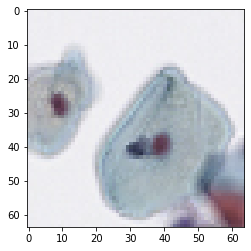

In [132]:
patch = output[0,:,0]
# print(patch[:64])
print(patch.size())
# print(patch.view(3,-1).permute(1,0).view(64,64,-1)[1])
print(patch.view(3,64,64).permute(1,2,0)[1])
# plt.imshow(patch.view(64,64,3).permute(1,0,2));
# plt.imshow(patch.view(3,64,64).permute(2,1,0));
plt.imshow(patch.view(3,64,64).permute(1,2,0).int());
# plt.imshow(patch.view(3,-1).permute(1,0).view(64,64,-1).int());

In [80]:
patch

tensor([237., 238., 240.,  ...,  75.,  82.,  99.])

In [24]:
# fold = nn.Fold(output_size=(4, 5), kernel_size=(2, 2))
# input = torch.randn(1, 3 * 2 * 2, 12)
# output = fold(input)
# output.size()

torch.Size([1, 3, 4, 5])

In [39]:
unfold = nn.Unfold(kernel_size=(4, 4), stride=2)
input = torch.randn(1, 1, 6, 6)
output = unfold(input)
# each patch contains 30 values (2x3=6 vectors, each of 5 channels)
# 4 blocks (2x3 kernels) in total in the 3x4 input
output.size()
# torch.Size([2, 30, 4])
print(input)
print(output.size())

tensor([[[[ 1.3740, -0.7059, -0.8498, -0.1314,  1.0968, -1.3292],
          [-1.6354, -0.9247,  0.8958, -1.4473, -1.6393,  0.5432],
          [ 1.2415, -1.0487, -0.7573,  0.4132,  1.6244, -0.5219],
          [-0.4479, -0.4422,  0.4504, -1.0810, -0.2792,  0.9170],
          [ 1.5546, -1.5648, -0.2942, -0.7997, -0.4361,  0.0949],
          [-1.5324,  0.5602,  0.7746,  0.1530, -0.2484, -0.3614]]]])
torch.Size([1, 16, 4])


In [44]:
print(output.size())
print(output)

torch.Size([1, 16, 4])
tensor([[[ 1.3740, -0.8498,  1.2415, -0.7573],
         [-0.7059, -0.1314, -1.0487,  0.4132],
         [-0.8498,  1.0968, -0.7573,  1.6244],
         [-0.1314, -1.3292,  0.4132, -0.5219],
         [-1.6354,  0.8958, -0.4479,  0.4504],
         [-0.9247, -1.4473, -0.4422, -1.0810],
         [ 0.8958, -1.6393,  0.4504, -0.2792],
         [-1.4473,  0.5432, -1.0810,  0.9170],
         [ 1.2415, -0.7573,  1.5546, -0.2942],
         [-1.0487,  0.4132, -1.5648, -0.7997],
         [-0.7573,  1.6244, -0.2942, -0.4361],
         [ 0.4132, -0.5219, -0.7997,  0.0949],
         [-0.4479,  0.4504, -1.5324,  0.7746],
         [-0.4422, -1.0810,  0.5602,  0.1530],
         [ 0.4504, -0.2792,  0.7746, -0.2484],
         [-1.0810,  0.9170,  0.1530, -0.3614]]])


In [47]:
print(output.view(4,4,4).permute(2,0,1))

tensor([[[ 1.3740, -0.7059, -0.8498, -0.1314],
         [-1.6354, -0.9247,  0.8958, -1.4473],
         [ 1.2415, -1.0487, -0.7573,  0.4132],
         [-0.4479, -0.4422,  0.4504, -1.0810]],

        [[-0.8498, -0.1314,  1.0968, -1.3292],
         [ 0.8958, -1.4473, -1.6393,  0.5432],
         [-0.7573,  0.4132,  1.6244, -0.5219],
         [ 0.4504, -1.0810, -0.2792,  0.9170]],

        [[ 1.2415, -1.0487, -0.7573,  0.4132],
         [-0.4479, -0.4422,  0.4504, -1.0810],
         [ 1.5546, -1.5648, -0.2942, -0.7997],
         [-1.5324,  0.5602,  0.7746,  0.1530]],

        [[-0.7573,  0.4132,  1.6244, -0.5219],
         [ 0.4504, -1.0810, -0.2792,  0.9170],
         [-0.2942, -0.7997, -0.4361,  0.0949],
         [ 0.7746,  0.1530, -0.2484, -0.3614]]])


In [137]:
a = torch.randn([2,3,4])
a


tensor([[[ 0.2387,  0.6544, -0.7995, -1.4213],
         [-0.5378, -0.2923, -1.7982, -1.4443],
         [ 2.5328,  1.2992, -0.3302, -0.0302]],

        [[ 0.9508, -1.1936,  1.0092,  0.5526],
         [ 1.2057, -0.7213, -0.4376, -0.3649],
         [-1.8564,  1.4243,  2.6863,  1.1067]]])

In [147]:
(torch.split(a, 1, dim=0))

(tensor([[[ 0.2387,  0.6544, -0.7995, -1.4213],
          [-0.5378, -0.2923, -1.7982, -1.4443],
          [ 2.5328,  1.2992, -0.3302, -0.0302]]]),
 tensor([[[ 0.9508, -1.1936,  1.0092,  0.5526],
          [ 1.2057, -0.7213, -0.4376, -0.3649],
          [-1.8564,  1.4243,  2.6863,  1.1067]]]))